In [32]:
from pyalgotrade import strategy
from pyalgotrade.technical import bollinger
from pyalgotrade.tools import quandl
from pyalgotrade.barfeed import quandlfeed
from pyalgotrade import plotter


class BollingerBands(strategy.BacktestingStrategy):
    # Set up the init
    def __init__(self, feed, instrument):
        super(BollingerBands, self).__init__(feed)
        self.__instrument = instrument
        self.__bbands = bollinger.BollingerBands(feed[instrument].getCloseDataSeries(), 20, 2)
        
    def getBollingerBands(self):
        return self.__bbands
    
    # What to do on each new bar    
    def onBars(self, bars):
        lower = self.__bbands.getLowerBand()[-1]
        upper = self.__bbands.getUpperBand()[-1]
        
        if lower != None:
            return

# Call the class, create a data feed and plot it            
def BB_plot():
    instrument = "AAPL"
    # Set the feed
    feed = quandlfeed.Feed()
    # Load the data
    feed.addBarsFromCSV("AAPL", f"WIKI-{instrument}-2011-quandl.csv")

    strat = BollingerBands(feed, instrument)
        
    plt = plotter.StrategyPlotter(strat, True, True, True)
    plt.getInstrumentSubplot(instrument).addDataSeries("upper", \
                                                       strat.getBollingerBands().getUpperBand())
    plt.getInstrumentSubplot(instrument).addDataSeries("middle", \
                                                       strat.getBollingerBands().getMiddleBand())
    plt.getInstrumentSubplot(instrument).addDataSeries("lower", \
                                                       strat.getBollingerBands().getLowerBand())
    
    strat.run()
    plt.plot()

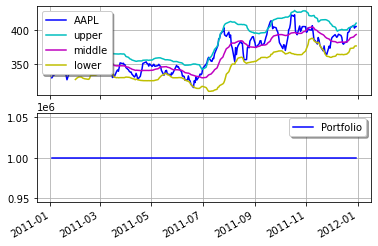

In [33]:
BB_plot()